In [2]:
# importing the necessary library to conduct analysis 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np


In [149]:
#loading the csv file 
data = pd.read_csv("fitness_class_2212.csv")
print(data.head(30))

    booking_id  months_as_member  weight days_before day_of_week time  \
0            1                17   79.56           8         Wed   PM   
1            2                10   79.01           2         Mon   AM   
2            3                16   74.53          14         Sun   AM   
3            4                 5   86.12          10         Fri   AM   
4            5                15   69.29           8         Thu   AM   
5            6                 7   93.33           2         Mon   AM   
6            7                11   88.59           6   Wednesday   PM   
7            8                 9   89.52          10         Fri   AM   
8            9                23   71.12          10        Fri.   AM   
9           10                 7   81.25          10         Fri   AM   
10          11                13   73.22           4         Tue   AM   
11          12                16   86.86          10         Fri   AM   
12          13                16   71.70          1

In [3]:
#columns of the dataframe 
data.columns

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')

In [4]:
# total number of rows and columns of a dataframe 
data.shape

(1500, 8)

In [5]:
#Information about the each columns of the dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [135]:
#data type of all the columns of the dataframe 
data.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before           int64
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [129]:
data['days_before'] = data['days_before'].str.replace("a","")

In [131]:
data['days_before'] = data['days_before'].str.strip()

In [134]:
data['days_before'] = data['days_before'].astype('int64')

In [7]:
#checking if any columns has a null values 
data.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [8]:
# checking the duplicates values 
data.duplicated().sum()

0

In [9]:
#selecting all the rows with the null values 
data[data.isnull().any(axis=1)]

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
114,115,14,NaN,10,Fri,AM,HIIT,0
211,212,16,NaN,10,Fri,AM,Cycling,0
315,316,5,NaN,14,Sun,AM,HIIT,0
366,367,4,NaN,2,Mon,AM,Aqua,0
482,483,14,NaN,1,Mon,PM,Aqua,0
552,553,11,NaN,9,Thu,AM,HIIT,0
655,656,5,NaN,12,Sat,AM,Strength,0
734,735,7,NaN,8,Thu,AM,HIIT,0
742,743,11,NaN,10,Wed,PM,HIIT,0
781,782,10,NaN,5,Tue,PM,HIIT,0


In [40]:
# replacing the missing value with average weight as only the weight columns contain the missing value 
data.fillna(data['weight'].mean())


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Strength'),
  Text(1, 0, 'HIIT'),
  Text(2, 0, 'Cycling'),
  Text(3, 0, 'Yoga'),
  Text(4, 0, '-'),
  Text(5, 0, 'Aqua')])

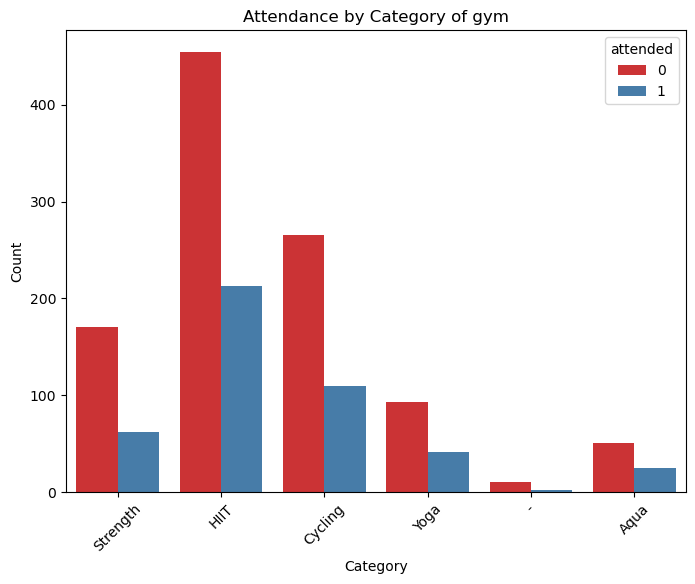

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='category', hue='attended', palette='Set1')
plt.title('Attendance by Category of gym')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45) 


In [7]:
pd.crosstab(data['category'],data['attended'])

attended,0,1
category,,
-,11,2
Aqua,51,25
Cycling,266,110
HIIT,454,213
Strength,171,62
Yoga,93,42


(-3.0, 140.0)

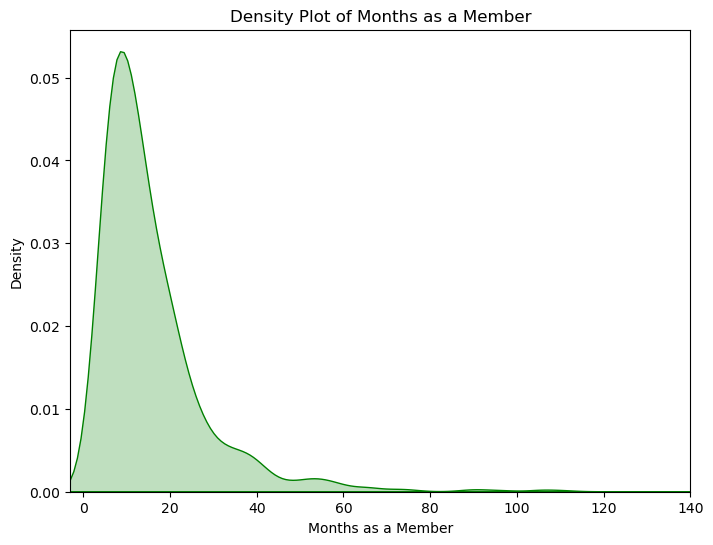

In [17]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['months_as_member'], shade=True, color='green')
plt.title('Density Plot of Months as a Member')
plt.xlabel('Months as a Member')
plt.ylabel('Density')
plt.xlim(-3,140)

Text(0.5, 1.0, ' relationship between attendance and numbe of months as a member.')

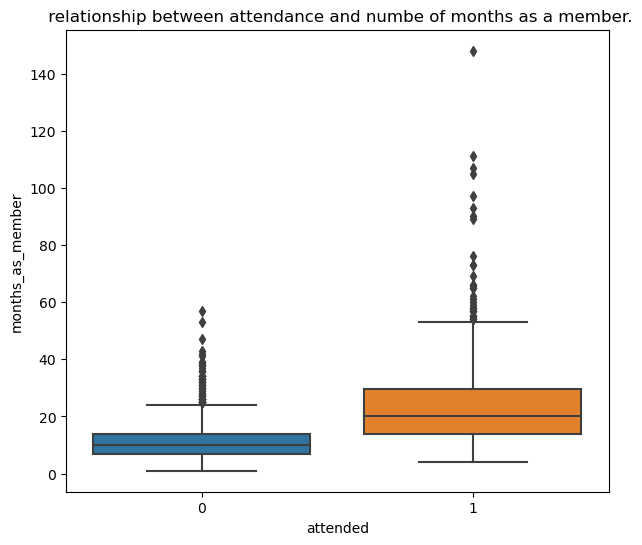

In [15]:
# boxplot the relationship between attendance and number of months as a member.
plt.figure(figsize=(7,6))
sns.boxplot(data=data, x='attended',y='months_as_member')
plt.title(' relationship between attendance and number of months as a member.')

Text(0.5, 1.0, 'Box Plot of Attendance by Months as Member (Outliers Removed)')

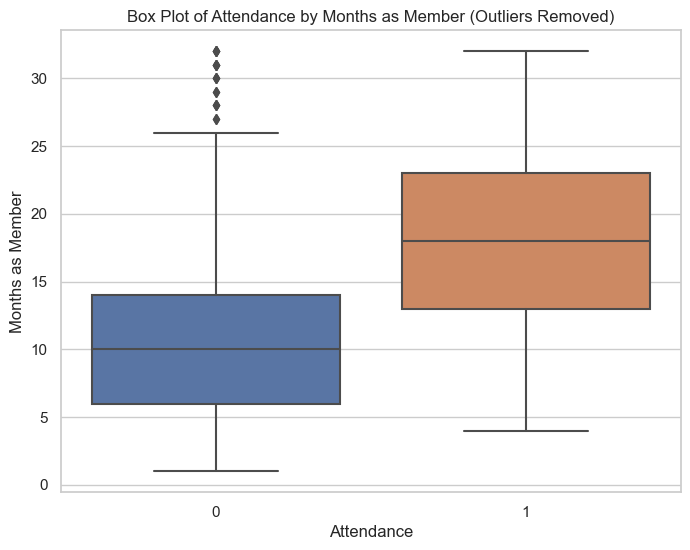

In [89]:
Q1 = data['months_as_member'].quantile(0.25)
Q3 = data['months_as_member'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
data = data[(data['months_as_member'] >= lower_bound) & (data['months_as_member'] <= upper_bound)]

# Create a box plot without outliers
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y="months_as_member", x="attended", data=data)

# Add labels and title
plt.ylabel('Months as Member')
plt.xlabel('Attendance')
plt.title('Box Plot of Attendance by Months as Member (Outliers Removed)')

In [20]:
data.groupby('attended')['months_as_member'].describe()

,count,mean,std,min,25%,50%,75%,max
attended,,,,,,,,
0,1046.0,11.495220,7.171546,1.0,7.0,10.0,14.00,57.0
1,454.0,25.151982,17.433856,4.0,14.0,20.0,29.75,148.0


Text(0.5, 1.0, 'Correlation Heatmap for Feature Selection')

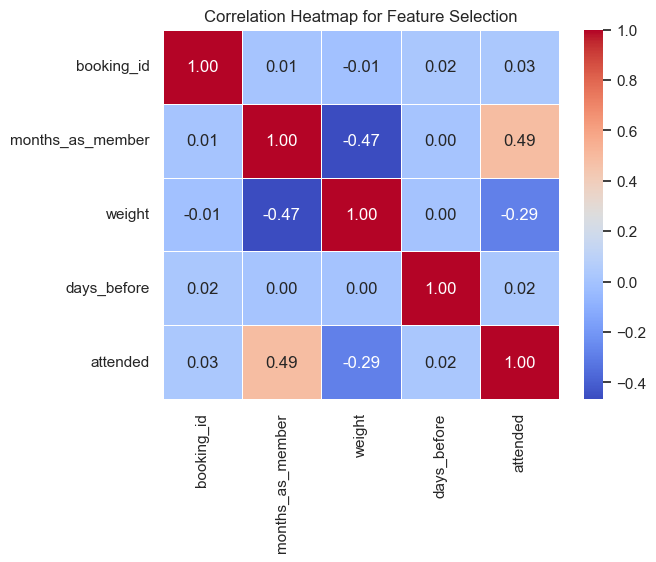

In [136]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Feature Selection')

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report
from sklearn.ensemble import RandomForestClassifier
X = np.array(data['months_as_member']).reshape(-1,1)  # Feature
y = data['attended']  # Target variable (0 for 'No' and 1 for 'Yes')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [143]:
#Fit a baseline model to predict whether members will attend using the data provided.
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)


In [144]:
# random foreset classifier model 
model2 = RandomForestClassifier(n_estimators=90, random_state=62)
model2.fit(X_train, y_train)
y_predict2 = model2.predict(X_test)


In [145]:
model_evaluation_randomForestClassifier = classification_report(y_test,y_predict2)
print(model_evaluation_randomForestClassifier )


              precision    recall  f1-score   support

           0       0.71      0.95      0.82       293
           1       0.75      0.29      0.42       157

    accuracy                           0.72       450
   macro avg       0.73      0.62      0.62       450
weighted avg       0.73      0.72      0.68       450



In [146]:
model_evaluation_logistic = classification_report(y_test,y_predict)
print(model_evaluation_logistic)

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       293
           1       0.78      0.38      0.51       157

    accuracy                           0.74       450
   macro avg       0.76      0.66      0.67       450
weighted avg       0.75      0.74      0.72       450



In [147]:

predict = model.predict(X)
act = data['attended']
predict_actual = pd.DataFrame({"attended":act,"Predicted":predict})

print(predict_actual.to_string())

      attended  Predicted
0            0          0
1            0          0
2            0          0
3            0          0
4            0          0
5            0          0
6            0          0
7            0          0
8            1          0
9            0          0
10           0          0
11           0          0
12           1          0
13           0          0
14           0          0
15           1          0
16           1          0
17           0          0
18           1          1
19           1          0
20           1          1
21           1          0
22           0          0
23           0          0
24           0          0
25           0          0
26           1          0
27           0          1
28           1          1
29           1          1
30           1          0
31           0          0
32           0          0
33           0          0
34           0          0
35           0          0
36           1          1
37          

In [70]:
pd.crosstab(predict_actual['Actual'],predict_actual['Predicted'])

Predicted,0,1
Actual,,
0,985,61
1,272,182


In [148]:
data.merge(predict_actual,on='attended',how='outer')

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended,Predicted
0,1,17,79.56,8,Wed,PM,Strength,0,0
1,1,17,79.56,8,Wed,PM,Strength,0,0
2,1,17,79.56,8,Wed,PM,Strength,0,0
3,1,17,79.56,8,Wed,PM,Strength,0,0
4,1,17,79.56,8,Wed,PM,Strength,0,0
...,...,...,...,...,...,...,...,...,...
1300227,1500,20,94.39,8,Thu,AM,Cycling,1,0
1300228,1500,20,94.39,8,Thu,AM,Cycling,1,0
1300229,1500,20,94.39,8,Thu,AM,Cycling,1,1
1300230,1500,20,94.39,8,Thu,AM,Cycling,1,0
